___

<a href='https://github.com/ai-vithink'> <img src='https://avatars1.githubusercontent.com/u/41588940?s=200&v=4' /></a>
___

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [1]:
import seaborn as sns

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')
# To hide warnings, which won't change the desired outcome.

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines 

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
%matplotlib inline
sns.set_style('darkgrid')

In [6]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. 
* What we mean by matrix form is that the index name and column name should match up, so that cell value shows something, which is relevant to both of the names.
For example:

* Right now we have tips where total_bill is a label or a variable and first value is 16.99 dollars, however row is not an actual variable here, in order to get the tips into matrix form we need to have variables on columns and rows.
* We can do so by multiple methods like pivot table or by getting correlation data.
* We will do corr first in the following manner :

In [8]:
tc = tips.corr() # Now as you see the tips is in matrix form with row and column both having variables.
# Now column and row variable name actually indicates relevancy to both column and rows where they are.

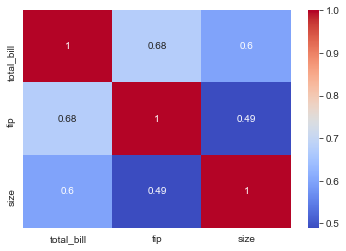

In [9]:
sns.heatmap(tc, annot=True, cmap='coolwarm')
# Heatmap just colours the values based on some gradient scale.
# Annotation -> annot to display the numbers on the heatmap, and cmap for colourmap you prefer.

In [10]:
# We have year month and passengers and we need to get it into matrix form.
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [11]:
flights.pivot_table(index='month', columns='year', values='passengers')
# index is your row, columns and values are numbers stored at the intersection of x,y row and column.

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


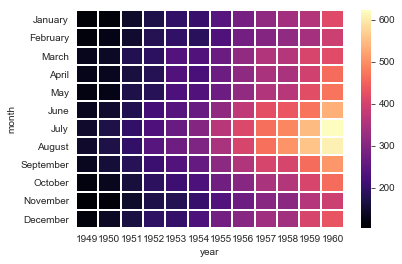

In [12]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)
#  cmap schemes : magma, coolwarm, spring

In [13]:
# !jt -r
# !jt -t monokai -T -N -kl

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

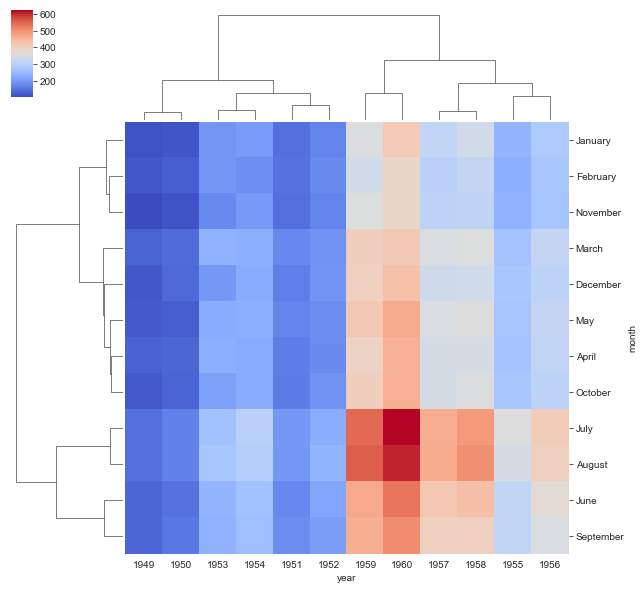

In [14]:
sns.clustermap(fp,cmap='coolwarm')

* Tries to cluster together rows and columns based on their similarity.
* Notice how months are not in the same order on y-axis as these have been clustered to put similar months together.
* Also some years are now out of order. e.g. 1959,1960 are similar to each other. So are August and July.
* For clarity try changing cmap.
* Another thing we can do is standardize the scale. In clustermap above we are on the scale 0 to 600. If we wanted to normalize this we can pass in an argument standard_scale and input 1 to normalize 0 to 600 scale to 0 to 1.

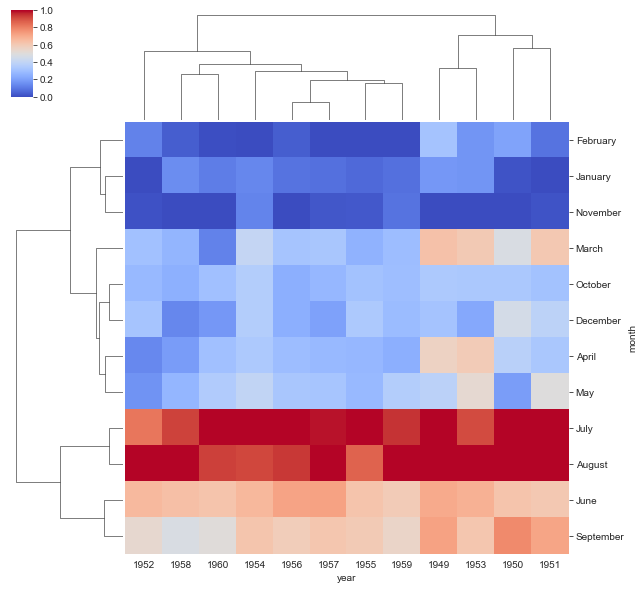

In [15]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

* After normalizing we can see that Winter months Feb,Jan and Nov are closer to less number of passengers and high passenger months are in summer months.
* Checkout documentation of clustermap if you are excited and want to know what actually is happening here.
* You might want to wait till we reach the machine learning clustering algorithms to understand and appreciate the mathematics behind the methods.
* Right now consider it just as a interesting way to interpret more information as you would get from a heatmap.